In [76]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder , PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix , f1_score , accuracy_score , classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score


# Reading the Data

In [2]:
data = pd.read_csv('data.csv')

# Pre-Processing and Feature Engineering

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2651 non-null   int64  
 1   name              2651 non-null   object 
 2   brand             2651 non-null   object 
 3   2G                2651 non-null   bool   
 4   3G                2651 non-null   bool   
 5   4G                2651 non-null   bool   
 6   5G                2651 non-null   bool   
 7   Announced         2651 non-null   float64
 8   Status            2651 non-null   object 
 9   Weight            2651 non-null   float64
 10  Length            2651 non-null   object 
 11  Width             2651 non-null   object 
 12  Diameter          2651 non-null   object 
 13  SIM               2651 non-null   object 
 14  Display Type      2651 non-null   object 
 15  Display Size      2651 non-null   float64
 16  ppi               2651 non-null   float64



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5  color=blue>
در مراحل پیش‌پردازش داده، برخی ستون‌ها را حذف کرده و ستون‌های جدیدی بر اساس فیچر‌های موجود ساخته‌ایم: 
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5  color=blue>    
۱- دو ستون اول (نام و ستون شماره ردیف‌ها) را حذف کرده‌ایم:  
</font>
</p>

In [4]:
data = data.drop(['Unnamed: 0','name'], axis=1)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
۲- بر اساس دو ستون مربوط به تجهیزات صدا، یک ستون سه ارزشی ساخته‌ایم. اگر هر دو ستون جک ۳.۵ میلیمتری و بلندگو مقدار ۱ داشته باشند ستون جدید مقدار ۲ می‌گیرد و اگر 
هرکدام ۱ و دیگری صفر باشد ستون جدید مقدار ۱ و اگر هردو صفر باشند ستون جدید مقدار صفر می‌گیرد.
</font>
</p>

In [5]:
data['Audio_Features'] = (data['Loudspeaker'] & data['3.5mm jack']) * 2 + (data['Loudspeaker'] ^ data['3.5mm jack'])

data.drop(['Loudspeaker', '3.5mm jack'], axis=1, inplace=True)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
۳- تعدادی از ستون‌هایی که نیاز به پردازش پیچیده‌تری دارند را حذف کرده‌ایم:
</font>
</p>

In [6]:
data = data.drop(['Bluetooth','Colors','WLAN','Card slot','Network','Internal','ratio'], axis=1)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
۴- برخی ستون‌ها را پیش‌پردازش کرده و مقادیر یا تایپ آنها را تغییر داده‌ایم تا آماده تحلیل باشند:
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3 color=blue> 
۱- تبدیل ستون استوس به حالت دو ارزشی
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3 color=blue>     
۲-   تبدیل تایپ ستون‌های طول و عرض
</font>
</p>
    
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3 color=blue> 
۳- تغییر موارد بازه‌ای در ستون دایامتر به مقدار میانگین دو طرف بازه
</font>
</p> 
    
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3 color=blue> 
۴- پردازش ستون نوع دیسپلی و استخراج چهار نوع کلی
</font>
</p>
    
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3 color=blue> 
۵- استخراج اسامی سیستم‌عامل‌ها
</font>
</p>   
    
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3 color=blue> 
۶- استخراج ۵ نوع اصلی سنسورها
</font>
</p>
    
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3 color=blue> 
۷- استخراج ۷ دسته برای ستون چیپ‌ست
</font>
</p>
    
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3 color=blue>        
۸- پر کردن داده‌های گمشده ستون سی‌پی‌یو بر اساس پر استفاده‌ترین سی‌پی‌یوها در هر سال 
</font>
</p>

In [7]:
data.Status.value_counts()

Discontinued    1381
Available       1267
Coming             3
Name: Status, dtype: int64

In [8]:
data['Status'] = data['Status'].replace('Coming', 'Available')

In [9]:
data.Status.value_counts()

Discontinued    1381
Available       1270
Name: Status, dtype: int64

In [10]:
data['Length'] = data['Length'].str.extract('(\d+\.?\d*)').astype(float)

In [11]:
data['Width']=data['Width'].str.extract('(\d+\.?\d*)').astype(float)

In [12]:
data.Diameter.value_counts()

 8.9           158
 7.9           151
 8             108
 8.5           101
 9.9            92
              ... 
 19.9            1
 13.3            1
 15.2            1
 6.3 - 9.8       1
 6.2             1
Name: Diameter, Length: 109, dtype: int64

In [13]:
def convert_to_average(diameter_str):

    if '-' in diameter_str:
        lower, upper = diameter_str.split('-')
        average = (float(lower) + float(upper)) / 2
        return average
    else:
        return float(diameter_str)

data['Diameter'] = data['Diameter'].str.split().str[0].apply(convert_to_average)

In [14]:
data['Display Type'].value_counts()

IPS LCD                                       1044
TFT                                            240
Super AMOLED                                   209
TFT, 256K colors                                92
AMOLED                                          58
                                              ... 
IPS LCD, 1B colors, 120Hz                        1
AMOLED, 1B colors, 120Hz, 1300 nits (peak)       1
AMOLED, 770 nits (HBM)                           1
AMOLED, 1B colors, 144Hz, 1000 nits (peak)       1
Super Clear LCD                                  1
Name: Display Type, Length: 317, dtype: int64

In [15]:
def categorize_display_type(display_type):
    display_type = display_type.lower()
    if 'retina' in display_type:
        return 'Retina'# Lowercase to standardize the input
    elif 'oled' in display_type or 'amoled' in display_type:
        return 'OLED'
    elif 'lcd' in display_type or 'tft' in display_type or 'ips' in display_type:
        return 'LCD'
   
    else:
        return 'Other'

# Apply the categorization function to the 'Display_type' column
data['Display Type'] = data['Display Type'].apply(categorize_display_type)

# Now you can inspect the distribution of your new categories
data['Display Type'].value_counts()


LCD       1952
OLED       661
Retina      32
Other        6
Name: Display Type, dtype: int64

In [16]:
data['OS'] = data['OS'].str.split().str[0]

In [17]:
data['OS'].value_counts()

Android      2449
Phone          64
iOS            60
HarmonyOS      21
Symbian        10
Belle           8
KaiOS           6
OS              5
iPadOS          5
EMUI            5
platform        5
Anna            3
Tizen           3
FP1             2
Firefox         1
Windows         1
Mobile          1
MeeGo           1
Linux           1
Name: OS, dtype: int64

In [18]:
data.loc[data['OS']=='Phone', 'OS'] = 'Windows'
data.loc[data['OS']=='Mobile', 'OS'] = 'Windows'
data.loc[data['OS']=='platform', 'OS'] = 'Nokia'
data.loc[74, 'OS'] = 'Firefox'
data.loc[75, 'OS'] = 'Firefox'
data.loc[93, 'OS'] = 'Firefox'
data.loc[1807, 'OS'] = 'Firefox'
data.loc[2598, 'OS'] = 'Android'

In [19]:
os_mapping = {
    'MeeGo': 'Other',
    'Windows':'Windows',
    'Firefox': 'Other',
    'Linux': 'Other',
    'FP1': 'Other',
    'Tizen': 'Other',
    'Anna': 'Other',
    'HarmonyOS': 'Other',
    'Android': 'Android',
    'iOS': 'iOS',
    'Symbian': 'Other',
    'Belle': 'Other',
    'KaiOS': 'Other',
    'iPadOS': 'Other',
    'EMUI': 'Other',
    'Nokia':'Other'
    
}
data['OS'] = data['OS'].map(os_mapping)

In [20]:
data['OS'].value_counts()

Android    2450
Other        75
Windows      66
iOS          60
Name: OS, dtype: int64

In [21]:
sensors_of_interest = ['accelerometer', 'gyro', 'proximity', 'barometer', 'fingerprint']

for sensor in sensors_of_interest:
    data[f'sensor_{sensor}'] = 0
def update_sensor_flags(row):
    sensor_data = str(row['Sensors']).lower() 
    for sensor in sensors_of_interest:
        if sensor in sensor_data:
            row[f'sensor_{sensor}'] = 1
    return row

data = data.apply(update_sensor_flags, axis=1)
data = data.drop('Sensors', axis=1)

In [22]:
data['Chipset'] = data['Chipset'].replace('5', np.nan)
data['Chipset'].fillna('Unknown', inplace=True)
def categorize_chipset(chipset):
    chipset = chipset.lower()
    if 'snapdragon' in chipset or 'qualcomm' in chipset:
        return 'Qualcomm'
    elif 'mediatek' in chipset or 'mt' in chipset:
        return 'MediaTek'
    elif 'apple' in chipset:
        return 'Apple'
    elif 'exynos' in chipset:
        return 'Samsung Exynos'
    elif 'intel' in chipset:
        return 'Intel'
    elif 'nvidia' in chipset:
        return 'Nvidia'
    else:
        return 'Other'
data['Chipset Manufacturer'] = data['Chipset'].apply(categorize_chipset)
data.drop('Chipset', axis=1, inplace=True)

In [23]:
data.groupby('Announced')['CPU'].count()

Announced
2010.0      2
2011.0     46
2012.0    143
2013.0    179
2014.0    294
2015.0    238
2016.0    199
2017.0    159
2018.0    190
2019.0    207
2020.0    236
2021.0    186
2022.0    176
2023.0    103
2024.0     14
Name: CPU, dtype: int64

In [24]:
data.groupby('Announced')['CPU'].apply(lambda x: x.mode()[0])

Announced
2010.0    2.0
2011.0    2.0
2012.0    2.0
2013.0    2.0
2014.0    4.0
2015.0    4.0
2016.0    4.0
2017.0    8.0
2018.0    8.0
2019.0    8.0
2020.0    8.0
2021.0    8.0
2022.0    8.0
2023.0    8.0
2024.0    8.0
Name: CPU, dtype: float64

In [25]:
most_frequent_cpu_by_year = data.groupby('Announced')['CPU'].agg(lambda x: pd.Series.mode(x)[0])

for year, cpu in most_frequent_cpu_by_year.items():
    data.loc[(data['Announced'] == year) & (data['CPU'].isnull()), 'CPU'] = cpu


In [26]:
data.head()

,brand,2G,3G,4G,5G,Announced,Status,Weight,Length,Width,...,GPU,RAM,Storage,Audio_Features,sensor_accelerometer,sensor_gyro,sensor_proximity,sensor_barometer,sensor_fingerprint,Chipset Manufacturer
0,alcatel,True,True,True,False,2022.0,Available,172.0,146.7,71.9,...,PowerVR GE8300,2.0,32.0,2,1,0,0,0,0,MediaTek
1,alcatel,True,True,True,False,2021.0,Available,190.0,156.4,74.8,...,IMG8322,2.0,32.0,2,1,0,1,0,1,Other
2,alcatel,True,True,True,False,2021.0,Available,134.0,137.6,65.7,...,PowerVR GE8100,1.0,8.0,2,1,0,1,0,0,MediaTek
3,alcatel,True,True,True,False,2021.0,Available,194.0,165.6,75.6,...,PowerVR GE8320,4.0,64.0,2,1,0,1,0,1,MediaTek
4,alcatel,True,True,True,False,2021.0,Available,190.0,165.6,75.6,...,PowerVR GE8320,3.0,32.0,2,1,0,1,0,1,MediaTek


In [27]:
bool_columns = data.select_dtypes(include=['bool']).columns
data[bool_columns] = data[bool_columns].astype(int)

# Encoding features

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
در این مرحله ستون‌هایی که ماهیت ترتیبی ندارند را وان‌هات و ستون‌هایی که ماهیت ترتیبی دارند به صورت عددی انکود کرده‌ایم.
</font>
</p>

In [28]:
columns_to_encode = ['brand', 'SIM', 'Display Type', 'OS', 'Chipset Manufacturer']
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[columns_to_encode]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))
data = pd.concat([data.drop(columns=columns_to_encode), encoded_df], axis=1)

In [29]:
columns_to_encode = ['Audio_Features','Announced', 'Status', 'CPU','RAM','Storage']
for column in columns_to_encode:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

data.head()

,2G,3G,4G,5G,Announced,Status,Weight,Length,Width,Diameter,...,OS_Other,OS_Windows,OS_iOS,Chipset Manufacturer_Apple,Chipset Manufacturer_Intel,Chipset Manufacturer_MediaTek,Chipset Manufacturer_Nvidia,Chipset Manufacturer_Other,Chipset Manufacturer_Qualcomm,Chipset Manufacturer_Samsung Exynos
0,1,1,1,0,12,0,172.0,146.7,71.9,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,1,0,11,0,190.0,156.4,74.8,9.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,1,0,11,0,134.0,137.6,65.7,9.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,1,1,0,11,0,194.0,165.6,75.6,8.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,1,1,0,11,0,190.0,165.6,75.6,8.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [30]:
le = LabelEncoder()
data['GPU'] = le.fit_transform(data['GPU'])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 59 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   2G                                   2651 non-null   int32  
 1   3G                                   2651 non-null   int32  
 2   4G                                   2651 non-null   int32  
 3   5G                                   2651 non-null   int32  
 4   Announced                            2651 non-null   int64  
 5   Status                               2651 non-null   int32  
 6   Weight                               2651 non-null   float64
 7   Length                               2651 non-null   float64
 8   Width                                2651 non-null   float64
 9   Diameter                             2651 non-null   float64
 10  Display Size                         2651 non-null   float64
 11  ppi                           

# Checking Relationshios

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
در این مرحله ابتدا روابط بین متغیرهای مستقل را بررسی می‌کنیم تا درباره اثر آنها بر متغیر وابسته و هم‌خطی میان خود متغیرهای مستقل اطلاعاتی بدست بیاوریم:
</font>
</p>

In [32]:
corr_matrix=data[['Announced', 'Weight', 'Length',
                   'Width', 'Diameter', 'Display Size', 'ppi', 
                   'body ratio','battery_capacity','CPU', 
                    'pixel', 'GPU', 'RAM', 'Storage','Price']].corr()
corr_matrix



,Announced,Weight,Length,Width,Diameter,Display Size,ppi,body ratio,battery_capacity,CPU,pixel,GPU,RAM,Storage,Price
Announced,1.000000,0.216229,0.403826,0.148538,-0.441960,0.538291,0.408832,0.826368,0.631270,0.787164,0.542012,0.049629,0.712494,0.652005,0.266497
Weight,0.216229,1.000000,0.929611,0.959540,-0.238511,0.888796,-0.127769,0.252390,0.761959,0.196692,0.376697,0.065961,0.259722,0.263799,0.320519
Length,0.403826,0.929611,1.000000,0.920098,-0.475163,0.971983,0.027790,0.462303,0.842882,0.413990,0.501589,0.063939,0.462824,0.440941,0.335055
Width,0.148538,0.959540,0.920098,1.000000,-0.327851,0.875054,-0.171898,0.194324,0.710308,0.162053,0.334786,0.068565,0.225060,0.227280,0.262193
Diameter,-0.441960,-0.238511,-0.475163,-0.327851,1.000000,-0.534775,-0.439195,-0.618587,-0.461574,-0.582662,-0.528710,0.006734,-0.640077,-0.590590,-0.278776
Display Size,0.538291,0.888796,0.971983,0.875054,-0.534775,1.000000,0.129369,0.623587,0.895648,0.520124,0.589154,0.052241,0.574081,0.538066,0.397758
ppi,0.408832,-0.127769,0.027790,-0.171898,-0.439195,0.129369,1.000000,0.583282,0.223173,0.582161,0.814707,-0.162339,0.637162,0.559948,0.456231
body ratio,0.826368,0.252390,0.462303,0.194324,-0.618587,0.623587,0.583282,1.000000,0.664450,0.794793,0.684587,-0.017696,0.845820,0.767288,0.425506
battery_capacity,0.631270,0.761959,0.842882,0.710308,-0.461574,0.895648,0.223173,0.664450,1.000000,0.587602,0.610992,0.026532,0.605622,0.554215,0.392868
CPU,0.787164,0.196692,0.413990,0.162053,-0.582662,0.520124,0.582161,0.794793,0.587602,1.000000,0.641650,-0.008518,0.763549,0.667369,0.316382


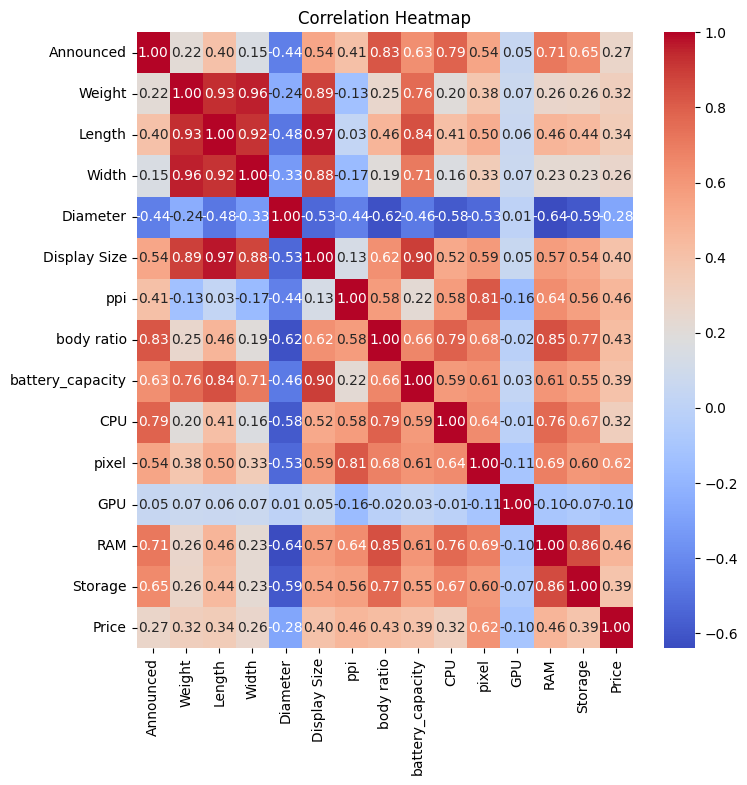

In [33]:
plt.figure(figsize=(8, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")


plt.title('Correlation Heatmap')
plt.show()

In [34]:
high_corr_pairs = []
for i, col1 in enumerate(corr_matrix.columns):
    for j, col2 in enumerate(corr_matrix.columns):
        if i < j and abs(corr_matrix.loc[col1, col2]) > 0.7:
            high_corr_pairs.append((col1, col2))

high_corr_df = pd.DataFrame(columns=['Column 1', 'Column 2', 'Correlation'])
for col1, col2 in high_corr_pairs:
    high_corr_df = high_corr_df.append({'Column 1': col1, 'Column 2': col2, 'Correlation': corr_matrix.loc[col1, col2]}, ignore_index=True)

print("Unique pairs of columns with correlation greater than 0.7:")
high_corr_df

Unique pairs of columns with correlation greater than 0.7:


,Column 1,Column 2,Correlation
0,Announced,body ratio,0.826368
1,Announced,CPU,0.787164
2,Announced,RAM,0.712494
3,Weight,Length,0.929611
4,Weight,Width,0.959540
5,Weight,Display Size,0.888796
6,Weight,battery_capacity,0.761959
7,Length,Width,0.920098
8,Length,Display Size,0.971983
9,Length,battery_capacity,0.842882


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
بررسی همبستگی میان متغیرهای فاصله‌ای نشان می‌دهد تعدادی از متغیرها همبستگی بسیار بالایی با یکدیگر دارند و از آنجا که قرار است از مدل‌سازی رگرسیون استفاده کنیم بهتر است ستون‌های با هم‌خطی بالا را در مدل رگرسیون به طور همزمان نداشته باشیم. در جدول بالا ستون‌های با همبستگی بالاتر از ۰.۷ را می‌توانیم مشاهده کنیم.  
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
۱- این جدول نشان می‌دهد ستون‌های مربوط به ابعاد گوشی همبستگی بسیار بالایی با یکدیگر دارند. بنابراین می‌توانیم برخی از این متغیرهای مستقل را حذف کنیم. 
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
۲-از سوی دیگر در نمودار زیر میبینیم که ظرفیت باطری هم با سایز صفحه همبستگی بسیار بالا و رابطه مستقیم دارد. بنابراین باید در مورد این دو ستون هم تصمیم بگیریم 
</font>
</p>

<AxesSubplot: xlabel='Display Size', ylabel='battery_capacity'>

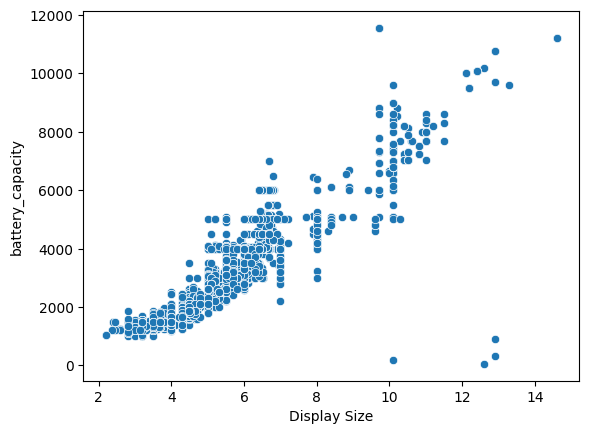

In [35]:
sns.scatterplot(x=data['Display Size'], y=data['battery_capacity']) 

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
با تقسیم ستون ظرفیت باتری به سایز صفحه ستون جدیدی ساخته‌ایم که عملکرد باتری را نشان می‌دهد.
</font>
</p>

In [36]:
data['battery_efficiency']=data['battery_capacity']/data['Display Size']

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
بر اساس دو ستون سی‌پی‌یو و جی‌پی‌یو یک ستون برای قدرت پردازش گوشی به طور کلی ساخته‌ایم</font>
</p>

In [37]:
data['proccessing_power']=data['CPU']*data['GPU']


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
بعد از استخراج متغیرهای بالا، ستون‌های با هم‌خطی زیاد را حذف کرده‌ایم:
</p>

In [38]:
data=data.drop(['Weight','Length','Width','pixel','RAM','battery_capacity','Display Size','body ratio','CPU','GPU',],axis=1)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
یک بررسی مجدد روی همبستگی میان ستون‌های غیرفاصله‌ای نشان می‌دهد ستون سال اعلام با ستون‌ها بسیاری همبستگی بالایی دارد که البته با توجه به اینکه فیچر‌های گوشی موبایل از جمله انواع سنسور یا نوع شبکه و ... در طول زمان تغییر میکنند این همبستگی طبیعی است. از این رو این ستون را هم از دیتاست نهایی حذف کرده‌ایم. 
</p>

In [40]:
corr_matrix=data.corr()
corr_matrix

high_corr_pairs = []
for i, col1 in enumerate(corr_matrix.columns):
    for j, col2 in enumerate(corr_matrix.columns):
        if i < j and abs(corr_matrix.loc[col1, col2]) > 0.6:
            high_corr_pairs.append((col1, col2))

high_corr_df = pd.DataFrame(columns=['Column 1', 'Column 2', 'Correlation'])
for col1, col2 in high_corr_pairs:
    high_corr_df = high_corr_df.append({'Column 1': col1, 'Column 2': col2, 'Correlation': corr_matrix.loc[col1, col2]}, ignore_index=True)

print("Unique pairs of columns with correlation greater than 0.8:")
high_corr_df

Unique pairs of columns with correlation greater than 0.8:


,Column 1,Column 2,Correlation
0,4G,Announced,0.607488
1,4G,Storage,0.605731
2,4G,SIM_Mini-SIM,-0.654389
3,Announced,Status,-0.868151
4,Announced,Storage,0.652005
5,Announced,sensor_fingerprint,0.659243
6,Announced,SIM_Mini-SIM,-0.603717
7,Announced,SIM_Nano-SIM,0.700727
8,Announced,battery_efficiency,0.679228
9,Status,sensor_fingerprint,-0.650196


In [41]:
data=data.drop(['Announced'],axis=1)

In [42]:
data.columns

Index(['2G', '3G', '4G', '5G', 'Status', 'Diameter', 'ppi', 'Price', 'Storage',
       'Audio_Features', 'sensor_accelerometer', 'sensor_gyro',
       'sensor_proximity', 'sensor_barometer', 'sensor_fingerprint',
       'brand_alcatel', 'brand_apple', 'brand_asus', 'brand_blu', 'brand_htc',
       'brand_huawei', 'brand_infinix', 'brand_lenovo', 'brand_lg',
       'brand_nokia', 'brand_samsung', 'brand_sony', 'brand_xiaomi',
       'brand_zte', 'SIM_Micro-SIM', 'SIM_Mini-SIM', 'SIM_Nano-SIM',
       'SIM_eSIM', 'Display Type_LCD', 'Display Type_OLED',
       'Display Type_Other', 'Display Type_Retina', 'OS_Android', 'OS_Other',
       'OS_Windows', 'OS_iOS', 'Chipset Manufacturer_Apple',
       'Chipset Manufacturer_Intel', 'Chipset Manufacturer_MediaTek',
       'Chipset Manufacturer_Nvidia', 'Chipset Manufacturer_Other',
       'Chipset Manufacturer_Qualcomm', 'Chipset Manufacturer_Samsung Exynos',
       'battery_efficiency', 'proccessing_power'],
      dtype='object')

## Charts 

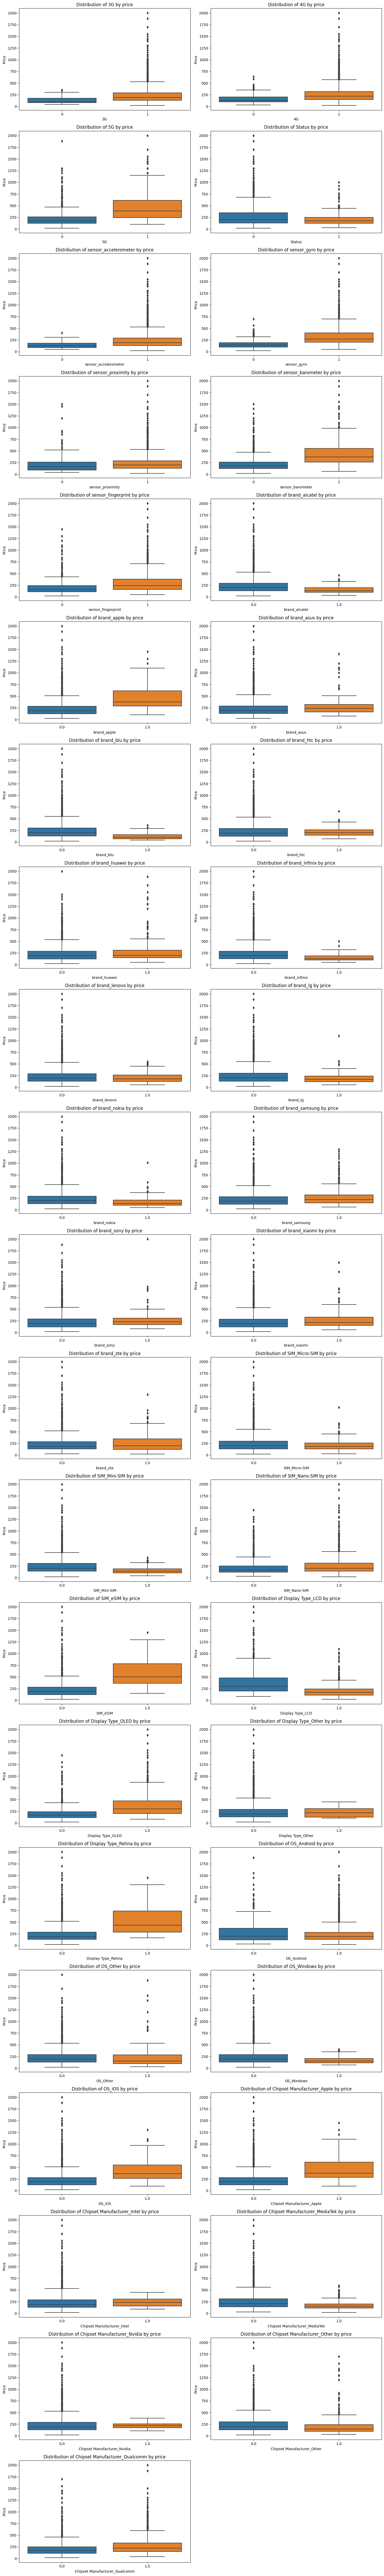

In [43]:
binary_columns = [col for col in data.columns if data[col].nunique() == 2]

fig_all, ax_all = plt.subplots(nrows=21, ncols=2, figsize=(15, 100))

for i, column in enumerate(binary_columns):
    sns.boxplot(x=column, y=data['Price'], data=data, ax=ax_all[i // 2, i % 2])
    ax_all[i // 2, i % 2].set_title(f'Distribution of {column} by price')


fig_all.delaxes(ax_all[20,1])
   
    
plt.tight_layout()
plt.show()


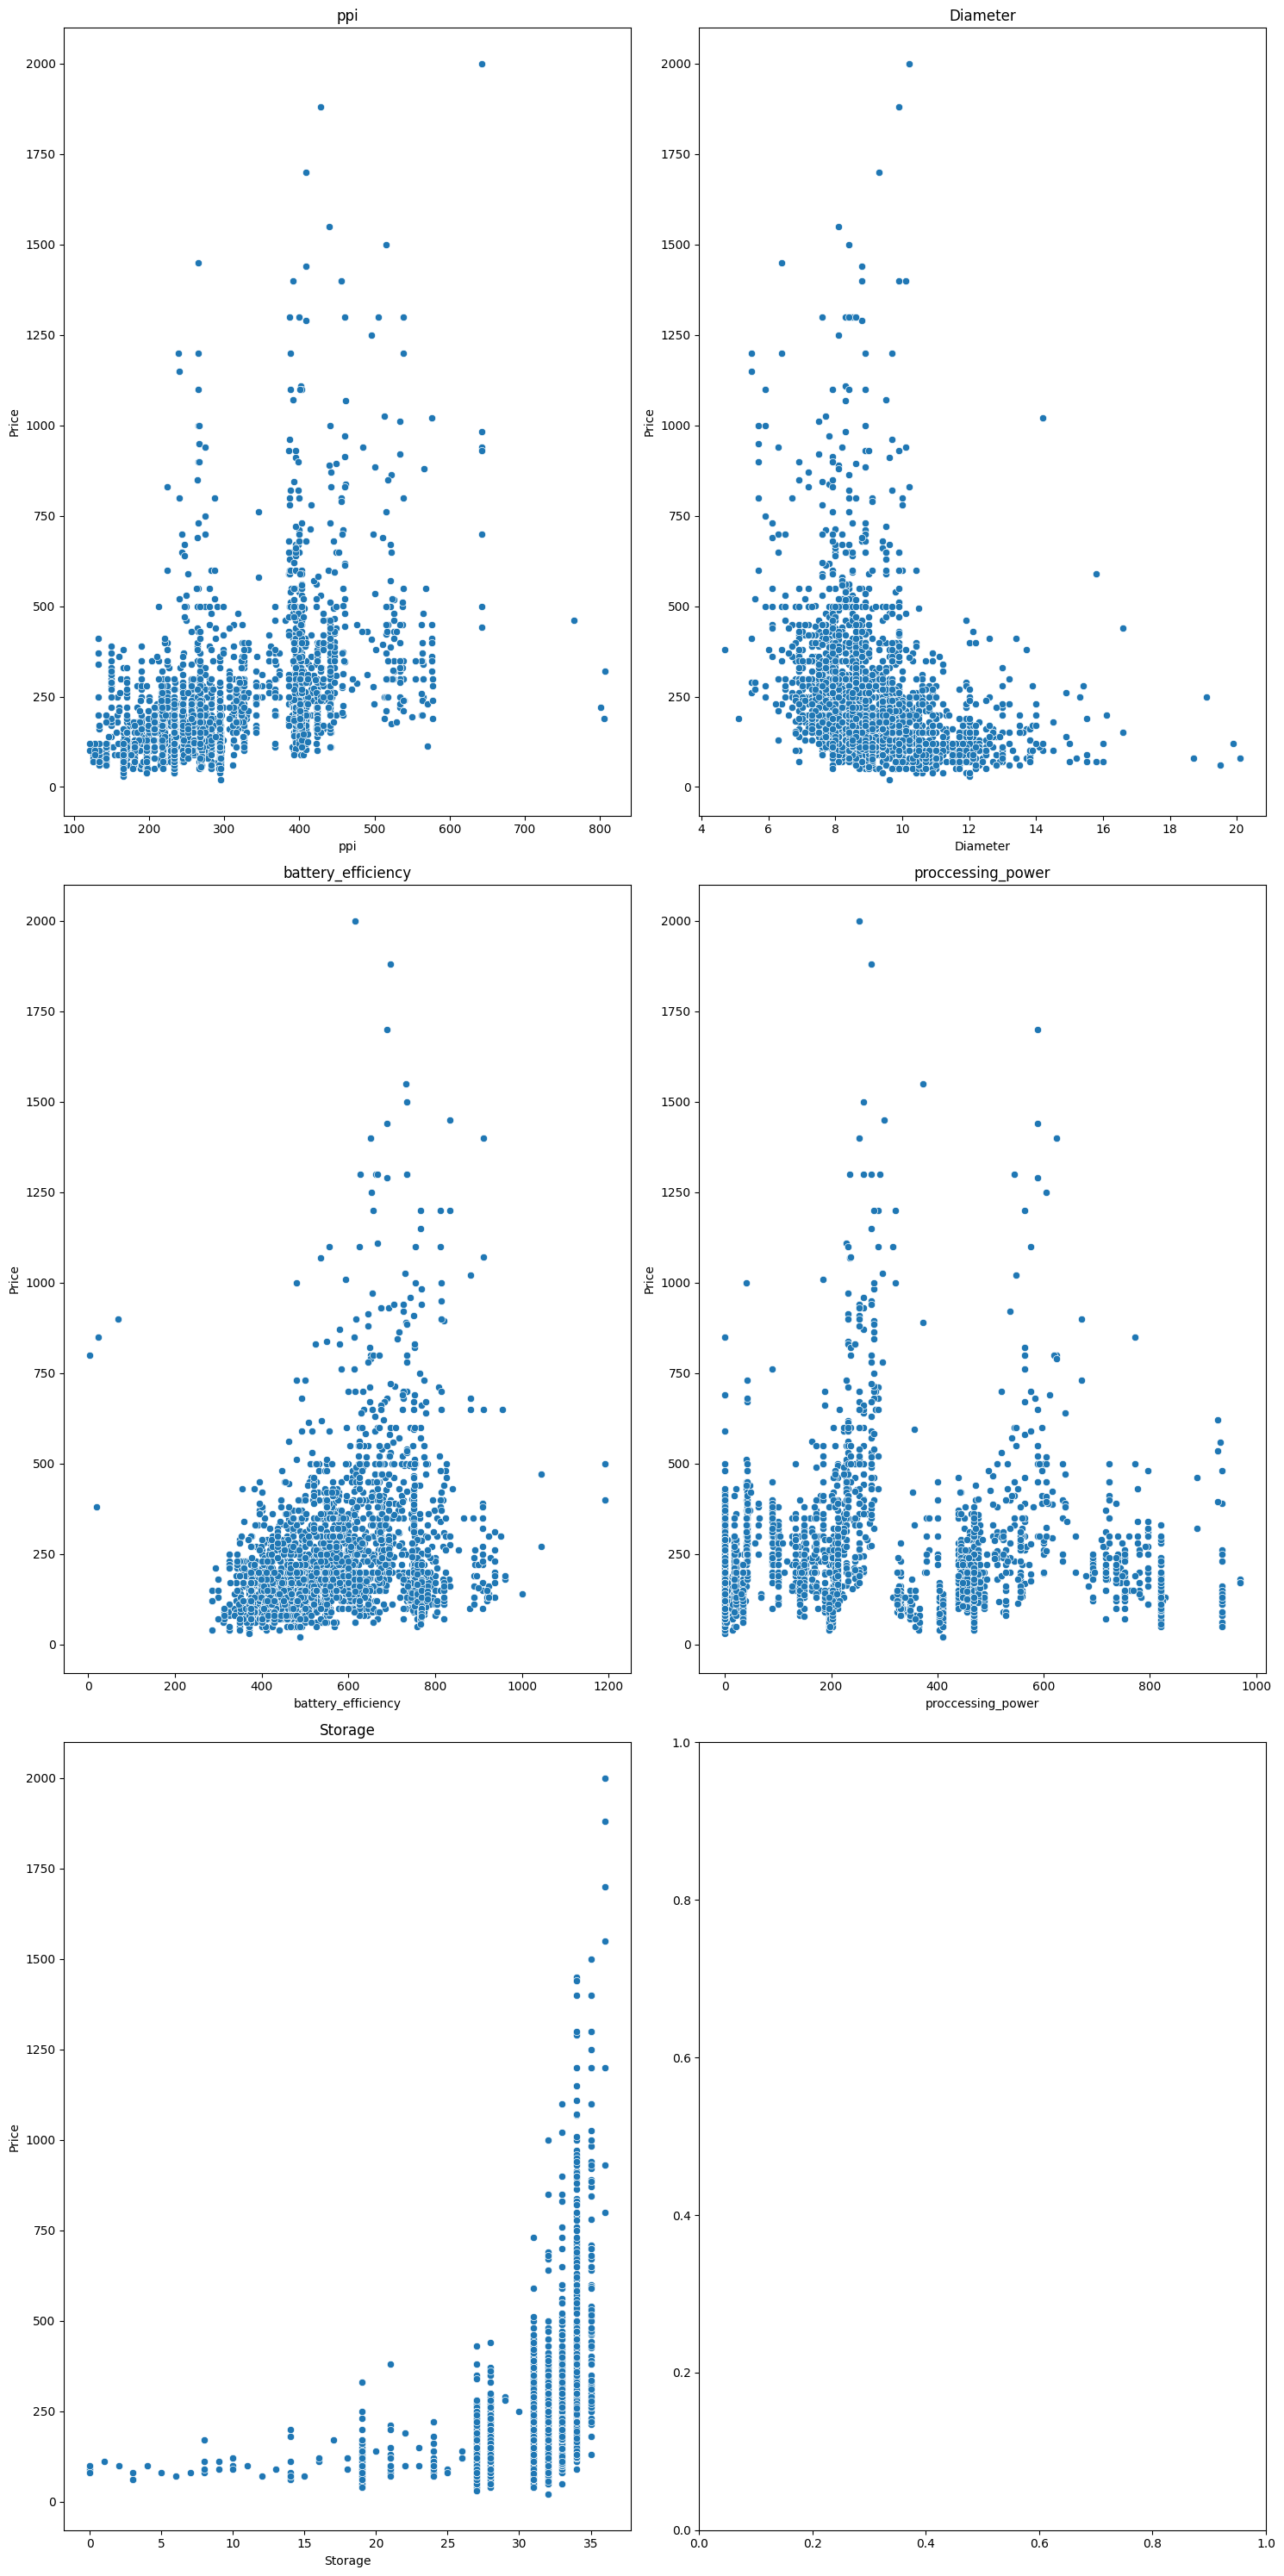

In [45]:
quant_df = data[['ppi' ,'Diameter','battery_efficiency','proccessing_power','Storage']]

fig_all, ax_all = plt.subplots(nrows=3, ncols=2, figsize=(15, 30))

for i, column in enumerate(quant_df.columns):
    sns.scatterplot(x=quant_df[column], y=data['Price'], ax=ax_all[i // 2, i % 2]) 
    ax_all[i // 2, i % 2].set_title(column)


plt.tight_layout()
plt.show()

# Defining X and y for model training

In [143]:
X = data.drop('Price', axis=1) 
y = data['Price']     

# Building a class for model evaluation

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
یک کلاس برای فرآیند گریدسرچ بر روی مدل رگرسیون ساخته‌ایم که در صورت نیاز نمودار ضرایب ستون‌ها را هم ترسیم می‌کند و در پایان بعد از انجام گریدسرچ بهترین پارامتر‌ها،  امتیاز آر۲ برای داده‌های آموزشی و اعتبارسنجی و سایر معیارهای مربوط به رگرسیون را هم گزارش می‌دهد. 
</font>
</p>

In [47]:
class RegressionModelGridSearch:
    
    def __init__(self, model, param_grid=None):
        self.model = model
        self.param_grid = param_grid
        self.best_model_coefs = None
        
        
    def coef_plot(self, best_model):
        if hasattr(best_model, 'coef_'):  # Check if the model has coef_ attribute
            bar_chart = pd.DataFrame({'Feature': X.columns, 'Coefficient': best_model.coef_})
            fig = px.bar(bar_chart, x='Coefficient', y='Feature')
            fig.update_layout(height=600, yaxis={'categoryorder':'total ascending'})
            fig.show()
        else:
            print("This model doesn't have coefficients to plot.")
        
        
    def additional_scores(self, y_true, y_pred):
        scores = {
            'Mean Absolute Error (MAE)': mean_absolute_error(y_true, y_pred),
            'Mean Squared Error (MSE)': mean_squared_error(y_true, y_pred),
            'Root Mean Squared Error (RMSE)': mean_squared_error(y_true, y_pred, squared=False),
            'Mean Absolute Percentage Error (MAPE)': np.mean(np.abs((y_true - y_pred) / y_true)) * 100,
            'Median Absolute Error (MedAE)': median_absolute_error(y_true, y_pred),
        }
        return scores

    def fit_and_score(self, X_train, y_train, X_val, y_val, chart=False, score=True):
        
        if self.param_grid is None:
            grid_search = self.model
        else:
            grid_search = GridSearchCV(self.model, self.param_grid, cv=5, return_train_score=True)
             
        grid_search.fit(X_train, y_train)    
        
        
        if self.param_grid is not None:
            print("Best Parameters:", grid_search.best_params_, '\n')

            best_model = grid_search.best_estimator_
            
            
            cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
            print("Cross Validation Scores:", cv_scores, '\n')
            print("Mean Cross Validation Score:", cv_scores.mean(), '\n')

            
        else:
            best_model = self.model          
        
        
        y_pred_train= best_model.predict(X_train)
        print(f" R2 Score on train set for {self.model} is {r2_score(y_train, y_pred_train)} \n")

        y_pred_valid = best_model.predict(X_val)
        print(f" R2 Score on validation set for {self.model} is {r2_score(y_val, y_pred_valid)} \n")
            
            
        if score:

            additional_scores_train = self.additional_scores(y_train, y_pred_train)
            additional_scores_val = self.additional_scores(y_val, y_pred_valid)

            print("Additional Scores for Training Set: \n")
            for score_name, score_value in additional_scores_train.items():
                print(f"{score_name}: {score_value}")

            print("\nAdditional Scores for Validation Set:")
            for score_name, score_value in additional_scores_val.items():
                print(f"{score_name}: {score_value}")
                
                
        if chart:           
            self.coef_plot(best_model)
            
        if hasattr(best_model, 'coef_'):
            self.best_model_coefs = best_model.coef_.tolist()
            
        

# Splitting Data



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
داده‌ها را به سه دسته آموزشی، اعتبارسنجی و تست تقسیم کرده‌ایم. با توجه به اینکه توزیع داده‌ها در بین انواع سیستم‌عامل‌ها بالانس نیست، در تقسیم داده‌ها این متغیر را استفاده‌ کرده‌ایم تا از کلاس‌های مختلف در هر سه دسته داده داشته باشیم.
</font>
</p>

In [144]:
stratify_cols = X[['OS_Android', 'OS_Other', 'OS_Windows', 'OS_iOS']]
stratify_combined = stratify_cols.apply(lambda row: ''.join(row.values.astype(str)), axis=1)


X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42,stratify=stratify_combined)

In [145]:
stratify_cols = X_train_val[['OS_Android', 'OS_Other', 'OS_Windows', 'OS_iOS']]
stratify_combined = stratify_cols.apply(lambda row: ''.join(row.values.astype(str)), axis=1)


X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42,stratify=stratify_combined)

## Scaling Data

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
داده‌ها را به کمک استاندارداسکیلر اسکیل کرده‌ایم
</font>
</p>  


In [146]:
scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_val= scaler.transform(X_val)

# Regression Models

## LinearRegression

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
در اولین مدل رگرسیون، از مدل رگرسیون خطی استفاده کرده‌ایم و چنان که نتایج نشان میدهد امتیاز تعمیم‌دهی یعنی آر۲ برای هر دو دسته آموزشی و اعتبارسنجی برابر ۵۴ درصد است. بنابراین به سراغ مدل‌های دیگر می‌رویم تا در صورت امکان نتایج بهتری کسب کنیم. 
</font>
</p>  




In [147]:
lr = LinearRegression()

grid_search = RegressionModelGridSearch(lr)

grid_search.fit_and_score(X_train, y_train, X_val, y_val, chart=True)

 R2 Score on train set for LinearRegression() is 0.5429274112560626 

 R2 Score on validation set for LinearRegression() is 0.5488763838361449 

Additional Scores for Training Set: 

Mean Absolute Error (MAE): 84.91388782332571
Mean Squared Error (MSE): 19146.551274082678
Root Mean Squared Error (RMSE): 138.37106371666974
Mean Absolute Percentage Error (MAPE): 38.94456633053959
Median Absolute Error (MedAE): 51.63180417286179

Additional Scores for Validation Set:
Mean Absolute Error (MAE): 76.7178460155988
Mean Squared Error (MSE): 13342.04397357998
Root Mean Squared Error (RMSE): 115.50776585831785
Mean Absolute Percentage Error (MAPE): 37.24314828934796
Median Absolute Error (MedAE): 54.49218934257442


## Lasso Regression

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
به کمک مدل لسو رگولاریزیشن انجام می‌دهیم تا ستون‌هایی که تاثیر چندانی بر متغیر هدف ندارند را در مدل‌های بعدی حذف کنیم
</font>
</p> 

In [148]:
lasso = Lasso()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0],
    'max_iter': [100, 500, 1000, 1500]
}

grid_search = RegressionModelGridSearch(lasso,param_grid)

grid_search.fit_and_score(X_train, y_train, X_val, y_val, chart = True)


C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.617e+06, tolerance: 5.708e+03

C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.551e+05, tolerance: 5.264e+03

C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.102e+06, tolerance: 6.098e+03

C:\Users\HP\Documents\Quera\qenv\lib\site-p

C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.351e+05, tolerance: 5.264e+03

C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.188e+06, tolerance: 6.098e+03

C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.035e+06, tolerance: 5.497e+03

C:\Users\HP\Documents\Quera\qenv\lib\site-p

Best Parameters: {'alpha': 1.0, 'max_iter': 100} 

Cross Validation Scores: [0.5071444  0.56137675 0.56324079 0.48476404 0.47043797] 

Mean Cross Validation Score: 0.5173927907539346 

 R2 Score on train set for Lasso() is 0.5443611412431573 

 R2 Score on validation set for Lasso() is 0.5524259702967491 

Additional Scores for Training Set: 

Mean Absolute Error (MAE): 83.44115149747272
Mean Squared Error (MSE): 19086.49301334441
Root Mean Squared Error (RMSE): 138.15387440583928
Mean Absolute Percentage Error (MAPE): 38.29774051819654
Median Absolute Error (MedAE): 51.880237586564476

Additional Scores for Validation Set:
Mean Absolute Error (MAE): 75.80669649466707
Mean Squared Error (MSE): 13237.064458102332
Root Mean Squared Error (RMSE): 115.0524422083353
Mean Absolute Percentage Error (MAPE): 37.141571953088906
Median Absolute Error (MedAE): 53.77146210884766


## Deleting less important columns based on lasso coefficients 
### coefficients greater than 0.1 are kept

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
در کد زیر ستون‌هایی که کمتر از یک‌دهم ضریب رگرسیون در مدل لسو داشته‌اند پیدا کرده و از داده‌ها حذف می‌کنیم. سپس داده‌ها را مجددا به سه دسته تقسیم و اسکیل می‌کنیم
</font>
</p> 

In [149]:
coefs=grid_search.best_model_coefs
all_columns =data.drop('Price',axis=1).columns.tolist()

nif=[]
for i in range(len(coefs)):
    if abs(coefs[i])<0.1:    
        nif.append(all_columns[i])

print('columns to drop:',nif)      


columns to drop: ['2G', '3G', '4G', 'sensor_accelerometer', 'brand_htc', 'brand_lenovo', 'brand_zte', 'SIM_Mini-SIM', 'OS_Android', 'Chipset Manufacturer_Intel', 'Chipset Manufacturer_Other']


In [150]:
X=X.drop(X[nif],axis=1)

In [151]:
X.columns

Index(['5G', 'Status', 'Diameter', 'ppi', 'Storage', 'Audio_Features',
       'sensor_gyro', 'sensor_proximity', 'sensor_barometer',
       'sensor_fingerprint', 'brand_alcatel', 'brand_apple', 'brand_asus',
       'brand_blu', 'brand_huawei', 'brand_infinix', 'brand_lg', 'brand_nokia',
       'brand_samsung', 'brand_sony', 'brand_xiaomi', 'SIM_Micro-SIM',
       'SIM_Nano-SIM', 'SIM_eSIM', 'Display Type_LCD', 'Display Type_OLED',
       'Display Type_Other', 'Display Type_Retina', 'OS_Other', 'OS_Windows',
       'OS_iOS', 'Chipset Manufacturer_Apple', 'Chipset Manufacturer_MediaTek',
       'Chipset Manufacturer_Nvidia', 'Chipset Manufacturer_Qualcomm',
       'Chipset Manufacturer_Samsung Exynos', 'battery_efficiency',
       'proccessing_power'],
      dtype='object')



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
این بار در تقسیم‌بندی داده‌ها با توجه به اینکه ستون سیستم‌عامل اندروید حذف شده‌است مبتنی بر ستون‌های باقی‌مانده از ستون‌های مربوط به برند دسته‌بندی را انجام می‌دهیم. 
</font>
</p>

In [152]:
stratify_cols = X[['brand_apple',
       'brand_asus', 'brand_blu', 'brand_huawei', 'brand_infinix',
       'brand_nokia', 'brand_samsung', 'brand_sony', 'brand_xiaomi']]
stratify_combined = stratify_cols.apply(lambda row: ''.join(row.values.astype(str)), axis=1)


X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42,stratify=stratify_combined)

In [153]:
stratify_cols = X_train_val[['brand_apple',
       'brand_asus', 'brand_blu', 'brand_huawei', 'brand_infinix',
       'brand_nokia', 'brand_samsung', 'brand_sony', 'brand_xiaomi']]
stratify_combined = stratify_cols.apply(lambda row: ''.join(row.values.astype(str)), axis=1)


X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42,stratify=stratify_combined)

In [154]:
scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_val= scaler.transform(X_val)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
در بخش‌های زیر مدل‌های رگرسیونی متفاوتی را بر روی داده‌ها و به کمک کلاس گریدسرچی که ساخته‌بودیم پیاده می‌کنیم تا نتایج حاصل را با هم مقایسه کنیم
</font>
</p>

## PolynomialRegression

### Degree = 2

In [61]:
poly_2 = PolynomialFeatures(degree=2)

X_poly_train = poly_2.fit_transform(X_train)
X_poly_val = poly_2.transform(X_val)

In [62]:
ply_lr_2 = LinearRegression()

grid_search = RegressionModelGridSearch(ply_lr_2)

grid_search.fit_and_score(X_poly_train, y_train, X_poly_val, y_val)


 R2 Score on train set for LinearRegression() is 0.8165084037983944 

 R2 Score on validation set for LinearRegression() is -3.12046393703502e+19 

Additional Scores for Training Set: 

Mean Absolute Error (MAE): 53.93394852723505
Mean Squared Error (MSE): 6951.611602818154
Root Mean Squared Error (RMSE): 83.3763251937752
Mean Absolute Percentage Error (MAPE): 26.702279573253406
Median Absolute Error (MedAE): 36.96875

Additional Scores for Validation Set:
Mean Absolute Error (MAE): 88997683777.79616
Mean Squared Error (MSE): 1.3317026529785746e+24
Root Mean Squared Error (RMSE): 1153994217047.2842
Mean Absolute Percentage Error (MAPE): 43766787385.76098
Median Absolute Error (MedAE): 55.78515625


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
نتایج حاصل از رگرسیون چندجمله‌ای درجه ۲ بیش‌برازش بسیار روی داده‌های آموزشی و نتیجه بسیار بد روی داده‌های اعتبارسنجی را نشان می‌دهد. بنابراین این مدل، کاندید مناسبی برای مدل نهایی نیست.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
 نتایج رگرسیون‌های چندجمله‌ای درجه‌های بالاتر در بلاک‌های پایینی هم نتیجه مشابهی را نشان می‌دهند.  
</font>
</p>

### Degree = 3

In [65]:
poly_3 = PolynomialFeatures(degree=3)

X_poly_train = poly_3.fit_transform(X_train)
X_poly_val = poly_3.transform(X_val)

In [66]:
ply_lr_3 = LinearRegression()

grid_search = RegressionModelGridSearch(ply_lr_3)

grid_search.fit_and_score(X_poly_train, y_train, X_poly_val, y_val)

 R2 Score on train set for LinearRegression() is 0.9927005744675613 

 R2 Score on validation set for LinearRegression() is -31193287532.825207 

Additional Scores for Training Set: 

Mean Absolute Error (MAE): 3.273514458988724
Mean Squared Error (MSE): 276.54002840247745
Root Mean Squared Error (RMSE): 16.629492728356972
Mean Absolute Percentage Error (MAPE): 1.5881038215039813
Median Absolute Error (MedAE): 2.3387372493743896e-05

Additional Scores for Validation Set:
Mean Absolute Error (MAE): 5946483.710098695
Mean Squared Error (MSE): 1331218197105296.0
Root Mean Squared Error (RMSE): 36485862.97602533
Mean Absolute Percentage Error (MAPE): 2789360.107794478
Median Absolute Error (MedAE): 133859.59325239528


### Degree = 4

In [67]:
poly_4 = PolynomialFeatures(degree=4)

X_poly_train = poly_4.fit_transform(X_train)
X_poly_val = poly_4.transform(X_val)

In [68]:
ply_lr_3 = LinearRegression()

grid_search = RegressionModelGridSearch(ply_lr_3)

grid_search.fit_and_score(X_poly_train, y_train, X_poly_val, y_val)

 R2 Score on train set for LinearRegression() is 0.9927005744668 

 R2 Score on validation set for LinearRegression() is -436827586854.7329 

Additional Scores for Training Set: 

Mean Absolute Error (MAE): 3.273710073364652
Mean Squared Error (MSE): 276.540028431317
Root Mean Squared Error (RMSE): 16.629492729224093
Mean Absolute Percentage Error (MAPE): 1.588222138394689
Median Absolute Error (MedAE): 0.0002388576976954937

Additional Scores for Validation Set:
Mean Absolute Error (MAE): 20574576.590592865
Mean Squared Error (MSE): 1.8642242565467588e+16
Root Mean Squared Error (RMSE): 136536597.8976611
Mean Absolute Percentage Error (MAPE): 9544305.938013194
Median Absolute Error (MedAE): 309947.85928676435


## DecisionTreeRegressoregressor

In [77]:
param_grid = {
    'max_depth': [1,2, 5, 10, 20, 25, None],
    'min_samples_split':[2, 5, 10, 20, 50],
    'min_samples_leaf':[1, 2, 5, 10, 20, 30],
    'ccp_alpha':[0,0.001, 0.01, 0.1, 1, 10]
}
dtr = DecisionTreeRegressor()


grid_search = RegressionModelGridSearch(dtr,param_grid)

grid_search.fit_and_score(X_train, y_train, X_val, y_val, chart = True)


Best Parameters: {'ccp_alpha': 10, 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2} 

Cross Validation Scores: [0.66850804 0.36026273 0.51430051 0.60923719 0.36218484] 

Mean Cross Validation Score: 0.5028986629176246 

 R2 Score on train set for DecisionTreeRegressor() is 0.6979737046444987 

 R2 Score on validation set for DecisionTreeRegressor() is 0.6153341844649158 

Additional Scores for Training Set: 

Mean Absolute Error (MAE): 63.727809851915914
Mean Squared Error (MSE): 11442.319662654467
Root Mean Squared Error (RMSE): 106.96877891541283
Mean Absolute Percentage Error (MAPE): 29.756975466394554
Median Absolute Error (MedAE): 38.333333333333314

Additional Scores for Validation Set:
Mean Absolute Error (MAE): 77.0227567426603
Mean Squared Error (MSE): 16416.164307445088
Root Mean Squared Error (RMSE): 128.12558022286217
Mean Absolute Percentage Error (MAPE): 31.528288269519365
Median Absolute Error (MedAE): 45.37986531986531
This model doesn't have coefficient

## RandomForestRegressor

In [180]:
n_estimator = [int(x) for x in np.linspace(start = 10 ,stop = 80, num = 10)]

max_features = ['log2' , 'sqrt']

max_depth =  [int(x) for x in np.linspace(start = 1 ,stop = 20, num = 5)]

min_samples_split = [int(x) for x in np.linspace(start = 2 ,stop = 10, num = 5)]

min_samples_leaf = [int(x) for x in np.linspace(start = 1 ,stop = 10, num = 2)]

bootstrap = [True , False]

In [181]:
#creating the param grid
param_grid = {
    'n_estimators': n_estimator,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap':bootstrap
}


In [182]:
rf = RandomForestRegressor()

grid_search = RegressionModelGridSearch(rf,param_grid)

grid_search.fit_and_score(X_train, y_train, X_val, y_val, chart = True)


Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 56} 

Cross Validation Scores: [0.72084974 0.58473858 0.69004172 0.7186971  0.47931619] 

Mean Cross Validation Score: 0.6387286671926653 

 R2 Score on train set for RandomForestRegressor() is 0.8959774551636102 

 R2 Score on validation set for RandomForestRegressor() is 0.7244164183429294 

Additional Scores for Training Set: 

Mean Absolute Error (MAE): 36.78173917142138
Mean Squared Error (MSE): 3940.912524652132
Root Mean Squared Error (RMSE): 62.77668774833642
Mean Absolute Percentage Error (MAPE): 16.809387647296955
Median Absolute Error (MedAE): 22.34363404452688

Additional Scores for Validation Set:
Mean Absolute Error (MAE): 62.538367505818805
Mean Squared Error (MSE): 11760.923831049544
Root Mean Squared Error (RMSE): 108.44779311285934
Mean Absolute Percentage Error (MAPE): 26.129477270859947
Median Absolute Error (MedAE): 38.8108436

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
الگوریتم رندم‌فارست برازش بالایی نشان می‌دهد که بیشتر از الگوریتم درخت‌تصمیم است، اما از طرفی تفاوت بین آر۲ روی داده‌های آموزشی و داده‌های اعتبارسنجی نشان می‌دهد مدل احتمالا روی داده‌های آموزشی بیش‌برازش شده‌است. 
</font>
</p>

## Gradient Boosting Regressor

In [158]:
n_estimator = [int(x) for x in np.linspace(start = 10 ,stop = 80, num = 10)]

a = [0.1 , 0.01 , 0.001 , 0.0001 , 0.00001]

max_depth =  [int(x) for x in np.linspace(start = 1 ,stop = 20, num = 10)]


In [159]:
param_grid = {
    'n_estimators': n_estimator,
    'learning_rate': a,
    'max_depth': max_depth,
}

In [160]:
gbr = GradientBoostingRegressor()

grid_search = RegressionModelGridSearch(gbr,param_grid)

grid_search.fit_and_score(X_train, y_train, X_val, y_val, chart = True)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 80} 

Cross Validation Scores: [0.72090321 0.56309944 0.62330903 0.70890428 0.50915877] 

Mean Cross Validation Score: 0.6250749471711594 

 R2 Score on train set for GradientBoostingRegressor() is 0.8134922781645206 

 R2 Score on validation set for GradientBoostingRegressor() is 0.7129072792261171 

Additional Scores for Training Set: 

Mean Absolute Error (MAE): 56.840094485005274
Mean Squared Error (MSE): 7065.878056356208
Root Mean Squared Error (RMSE): 84.05877739032496
Mean Absolute Percentage Error (MAPE): 28.73737850663549
Median Absolute Error (MedAE): 39.53822717211517

Additional Scores for Validation Set:
Mean Absolute Error (MAE): 66.94215571493298
Mean Squared Error (MSE): 12252.092817604844
Root Mean Squared Error (RMSE): 110.68917208835218
Mean Absolute Percentage Error (MAPE): 28.54261842108363
Median Absolute Error (MedAE): 40.555701903058534
This model doesn't have coefficients to plot.


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
الگوریتم گرادیانت‌بوستینگ برازش بالایی نشان می‌دهد. و تفاوت هم میان داده آموزشی و اعتبارسنجی معقول‌تر از مدل رندم‌فارست است. به نظر می‌رسد این مدل کاندید بهتری برای مدل نهایی است.  
</font>
</p>

## LGBM Regressor

In [78]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor()


grid_search = RegressionModelGridSearch(lgbm)

grid_search.fit_and_score(X_train, y_train, X_val, y_val, chart = True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 1689, number of used features: 36
[LightGBM] [Info] Start training from score 242.036217
 R2 Score on train set for LGBMRegressor() is 0.8808482943834891 

 R2 Score on validation set for LGBMRegressor() is 0.7149791603076819 

Additional Scores for Training Set: 

Mean Absolute Error (MAE): 40.39890296936132
Mean Squared Error (MSE): 4514.083458891741
Root Mean Squared Error (RMSE): 67.18692922653737
Mean Absolute Percentage Error (MAPE): 19.087601911053532
Median Absolute Error (MedAE): 26.363716357197546

Additional Scores for Validation Set:
Mean Absolute Error (MAE): 66.0509248206029
Mean Squared Error (MSE): 12163.672326657022
Root Mean Squared Error (RMSE): 110.289039

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
الگوریتم لایت‌جی‌بی‌ام برازش بالایی نشان می‌دهد اما از طرفی تفاوت بین آر۲ روی داده‌های آموزشی و داده‌های اعتبارسنجی نشان می‌دهد مدل احتمالا روی داده‌های آموزشی بیش‌برازش شده‌است. 
</font>
</p>

# Choosing the best model to fit on the test data

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=red> 
  در نهایت با توجه به نتایج حاصل از مدل‌های بالا به نظر می‌رسد، بهترین انتخاب که روی داده‌های آموزشی بیش‌برازش نشده و بالاترین نتیجه را برای داده‌های اعتبارسنجی نشان می‌دهد مدل گرادیانت‌بوستینگ با هایپرپارامتر‌های بدست‌آمده از گریدسرچ است. مطابق این هایپرپارامترها عمق درخت 3 و تعداد درخت‌ها ۸۰ تاست.    
</font>
</p>

In [194]:
gbr = GradientBoostingRegressor(learning_rate= 0.1, max_depth=3, n_estimators=80)

gbr.fit(X_train, y_train)

y_pred=gbr.predict(X_test)

print('R2 Score for validation set',r2_score(y_test, y_pred))

R2 Score for validation set 0.6491517968566886


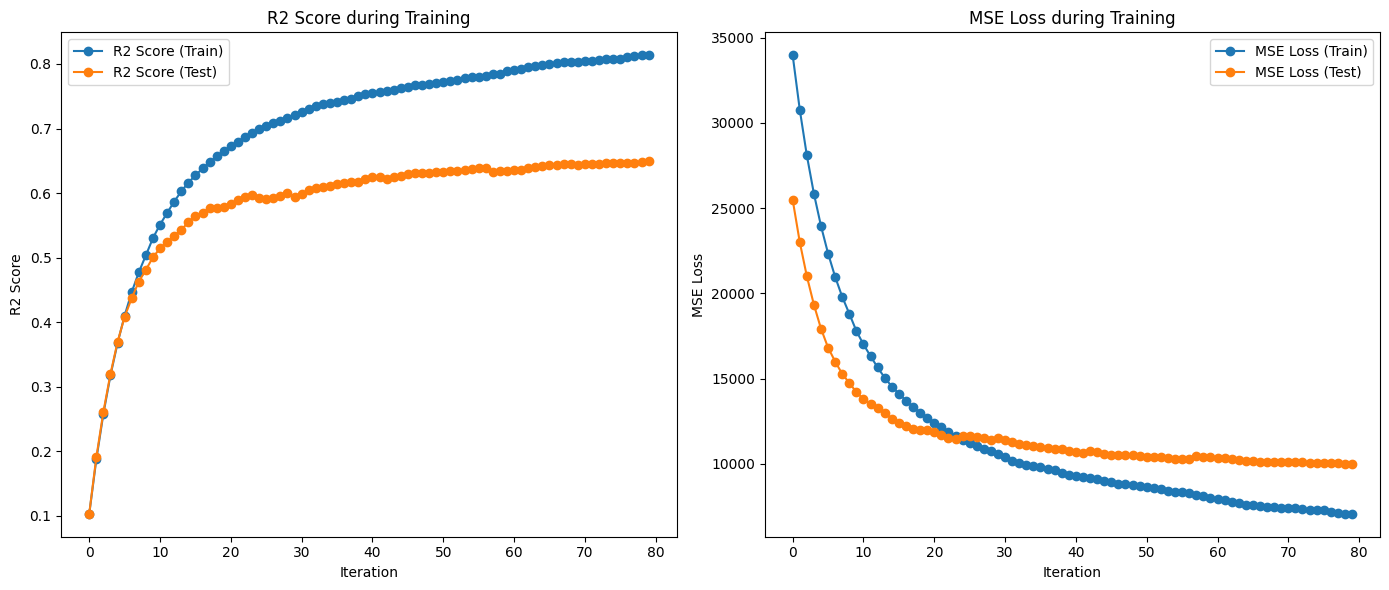

In [195]:
r2_scores_train = []
r2_scores_test = []
mse_losses_train = []
mse_losses_test = []

for y_pred_train in gbr.staged_predict(X_train):
    r2_scores_train.append(r2_score(y_train, y_pred_train))
    mse_losses_train.append(mean_squared_error(y_train, y_pred_train))
    
for y_pred_test in gbr.staged_predict(X_test):
    r2_scores_test.append(r2_score(y_test, y_pred_test))
    mse_losses_test.append(mean_squared_error(y_test, y_pred_test))

plt.figure(figsize=(14, 6))

# R2 Scores
plt.subplot(1, 2, 1)
plt.plot(r2_scores_train, label='R2 Score (Train)', marker='o')
plt.plot(r2_scores_test, label='R2 Score (Test)', marker='o')
plt.title('R2 Score during Training')
plt.xlabel('Iteration')
plt.ylabel('R2 Score')
plt.legend()

# MSE Losses
plt.subplot(1, 2, 2)
plt.plot(mse_losses_train, label='MSE Loss (Train)', marker='o')
plt.plot(mse_losses_test, label='MSE Loss (Test)', marker='o')
plt.title('MSE Loss during Training')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Extra

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
در این قسمت صرفا برای بررسی بیشتر و دستیابی به مدلی با دقت بیشتر مدل گرادیانت بوستیگ را با عمق درخت‌های متفاوت اعمال کردیم و در عمق درخت ۷ دیدیم دقت این مدل بالاتر از گرادیانت‌بوستینگ با هایپرپارامتر‌های بدست‌آمده از گریدسرچ است.
</font>
</p>

In [196]:
gbr = GradientBoostingRegressor(learning_rate= 0.1, max_depth=7, n_estimators=80)

gbr.fit(X_train, y_train)

y_pred=gbr.predict(X_test)

print('R2 Score for validation set',r2_score(y_test, y_pred))


R2 Score for validation set 0.7048655607325827


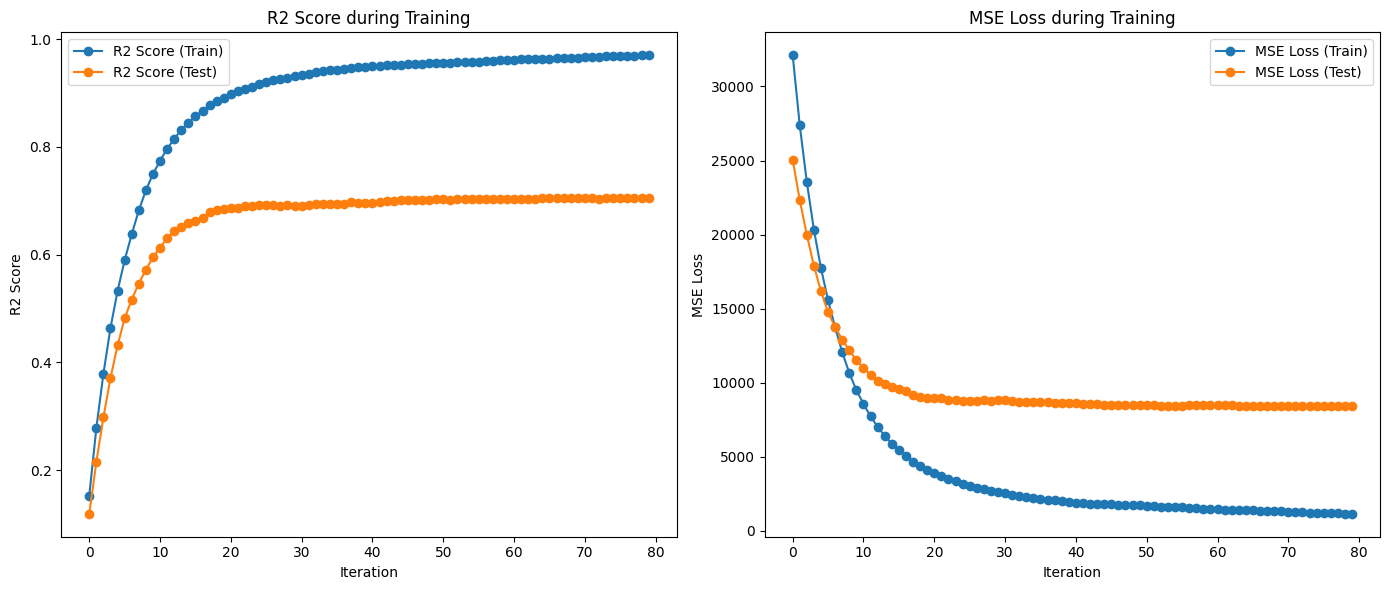

In [197]:
r2_scores_train = []
r2_scores_test = []
mse_losses_train = []
mse_losses_test = []

for y_pred_train in gbr.staged_predict(X_train):
    r2_scores_train.append(r2_score(y_train, y_pred_train))
    mse_losses_train.append(mean_squared_error(y_train, y_pred_train))
    
for y_pred_test in gbr.staged_predict(X_test):
    r2_scores_test.append(r2_score(y_test, y_pred_test))
    mse_losses_test.append(mean_squared_error(y_test, y_pred_test))

plt.figure(figsize=(14, 6))

# R2 Scores
plt.subplot(1, 2, 1)
plt.plot(r2_scores_train, label='R2 Score (Train)', marker='o')
plt.plot(r2_scores_test, label='R2 Score (Test)', marker='o')
plt.title('R2 Score during Training')
plt.xlabel('Iteration')
plt.ylabel('R2 Score')
plt.legend()

# MSE Losses
plt.subplot(1, 2, 2)
plt.plot(mse_losses_train, label='MSE Loss (Train)', marker='o')
plt.plot(mse_losses_test, label='MSE Loss (Test)', marker='o')
plt.title('MSE Loss during Training')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.legend()

plt.tight_layout()
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
در این قسمت نیز بار دیگر مدل رندوم فارست را با هایپرپارامترهای حاصل از گرید سرچ اجرا کردیم و دیدیم با وجود اینکه قبلا به نظر بیش‌برازش رخ داده بود،‌روی داده تست دقت بالاتری نسبت به گرادیانت بوستینگ بدست می‌آید. 
</font>
</p>

In [198]:
rf = RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt', min_samples_leaf= 1, min_samples_split= 6, n_estimators=33)
rf.fit(X_train, y_train)

y_pred=rf.predict(X_test)

print('R2 Score for validation set',r2_score(y_test, y_pred))

R2 Score for validation set 0.7125257795230209
